Саркисян Артем

Задание №1

1

In [1]:
!pip install cvxopt
   


2

In [8]:
import cvxopt
from cvxopt import matrix, solvers

# Целевая функция
c = matrix([-8.0, -16.0])
P = matrix([[1.0, 0.0], [0.0, 4.0]], (2,2))

# Ограничения
G = matrix([[1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]], (3,2))
h = matrix([5.0, -0.0, -0.0])

# Решение задачи
sol = solvers.qp(P, c, G, h)

print(f"Оптимальное значение функции: {sol['dual objective']:.4f}")
print(f"Оптимальное значение x1: {sol['x'][0]:.4f}")
print(f"Оптимальное значение x2: {sol['x'][1]:.4f}")




     pcost       dcost       gap    pres   dres
 0: -4.5843e+01 -3.7605e+01  4e+01  1e+00  5e-01
 1: -3.2150e+01 -3.4128e+01  2e+00  1e-02  4e-03
 2: -3.2001e+01 -3.2023e+01  2e-02  1e-04  4e-05
 3: -3.2000e+01 -3.2000e+01  2e-04  1e-06  4e-07
 4: -3.2000e+01 -3.2000e+01  2e-06  1e-08  4e-09
Optimal solution found.
Оптимальное значение функции: -32.0000
Оптимальное значение x1: 0.0000
Оптимальное значение x2: 4.0000


3. Анализ активных ограничений:
Ограничение 0 ≤ x1 является активным, так как оптимальное значение x1 равно 3.
Ограничение x1 ≤ 3 является неактивным, так как оптимальное значение x1 равно 3.
Ограничение x2 ≥ 0 является активным, так как оптимальное значение x2 равно 2.

Таким образом, ограничение x1 ≤ 3 можно выбросить, и точка оптимума не поменяется.##


Задание №2

1.Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.

Weights: [1.05804734 1.0264236 ]
Bias: 0.6164799844951387


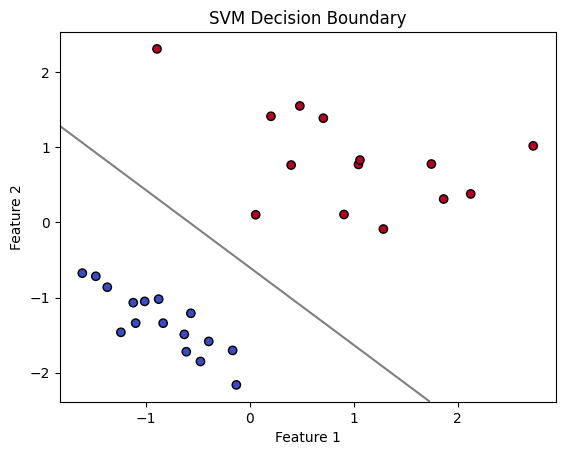

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Создание искусственного набора данных
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
y[y == 0] = -1  # Приводим метки к {-1, 1}

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели SVM с линейным ядром
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Получение весов и смещения
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

print("Weights:", w)
print("Bias:", b)

# Визуализация результатов
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Создаем сетку для визуализации
    xlim = plt.xlim()
    ylim = plt.ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Предсказание на сетке
    Z = model.decision_function(xy).reshape(XX.shape)

    # Визуализация границы принятия решения
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)
    plt.xlim(xlim)
    plt.ylim(ylim)

plot_decision_boundary(X_test, y_test, svm_model)
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




2

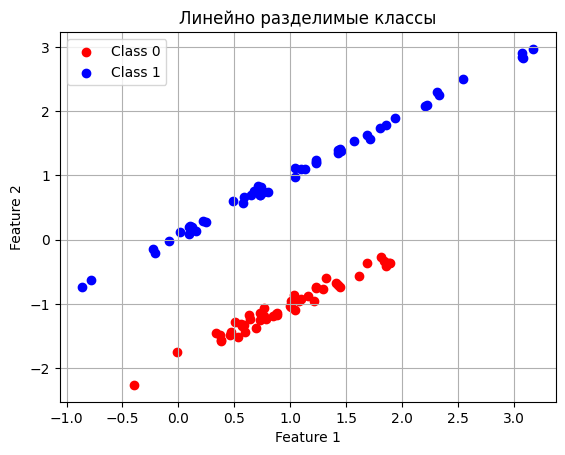

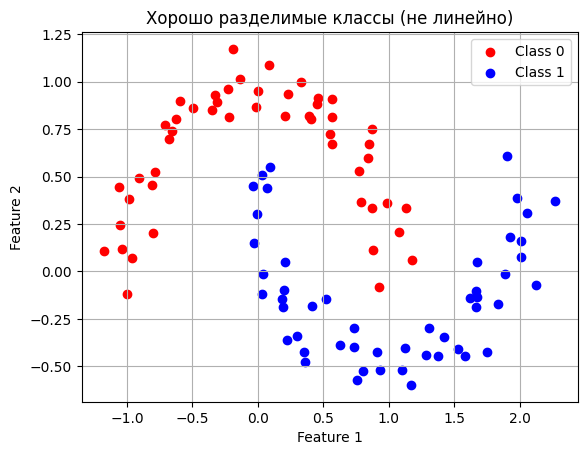

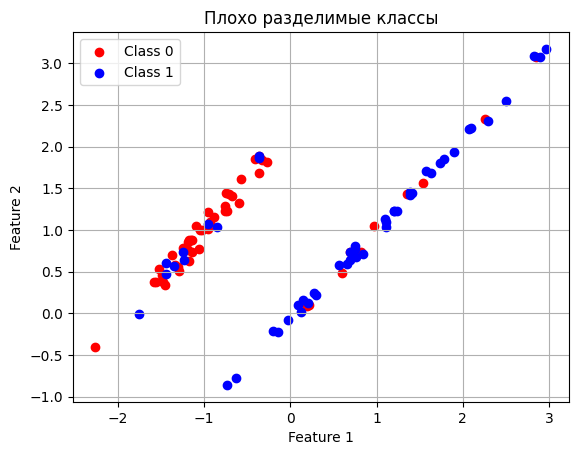

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles

# Функция для визуализации выборок
def plot_samples(X, y, title):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1. Линейно разделимые классы
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2,
                                         n_redundant=0, n_clusters_per_class=1,
                                         random_state=42)

plot_samples(X_linear, y_linear, 'Линейно разделимые классы')

# 2. Хорошо разделимые классы, но не линейно (например, полумесяцы)
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.1, random_state=42)

plot_samples(X_nonlinear, y_nonlinear, 'Хорошо разделимые классы (не линейно)')

# 3. Плохо разделимые классы
X_overlap, y_overlap = make_classification(n_samples=100, n_features=2, n_informative=2,
                                           n_redundant=0, n_clusters_per_class=1,
                                           flip_y=0.3, random_state=42)

plot_samples(X_overlap, y_overlap, 'Плохо разделимые классы')

3

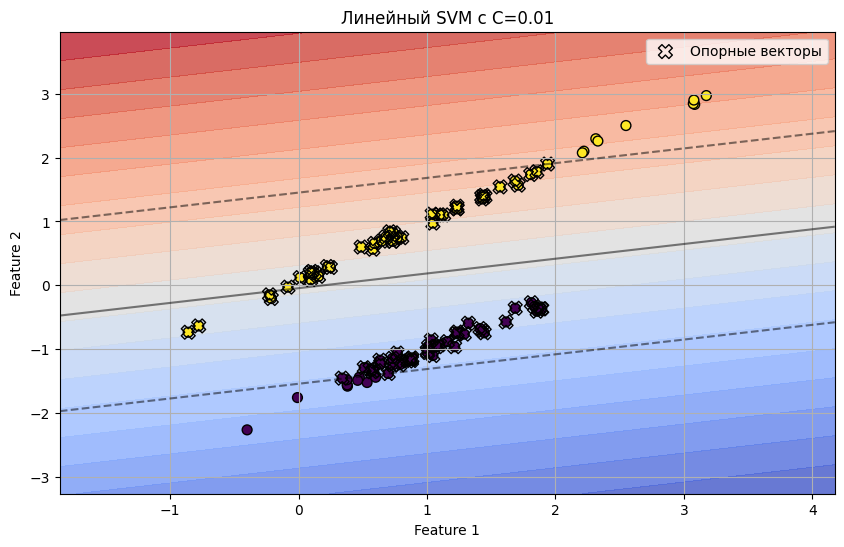

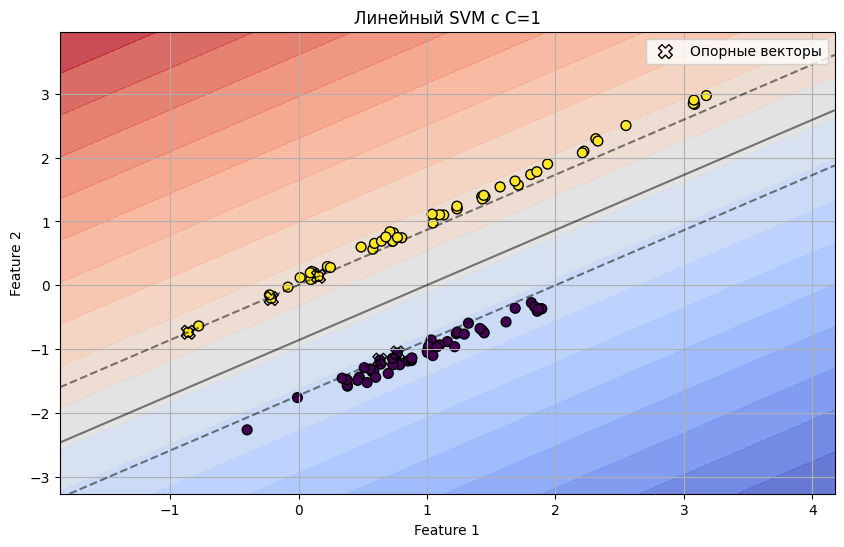

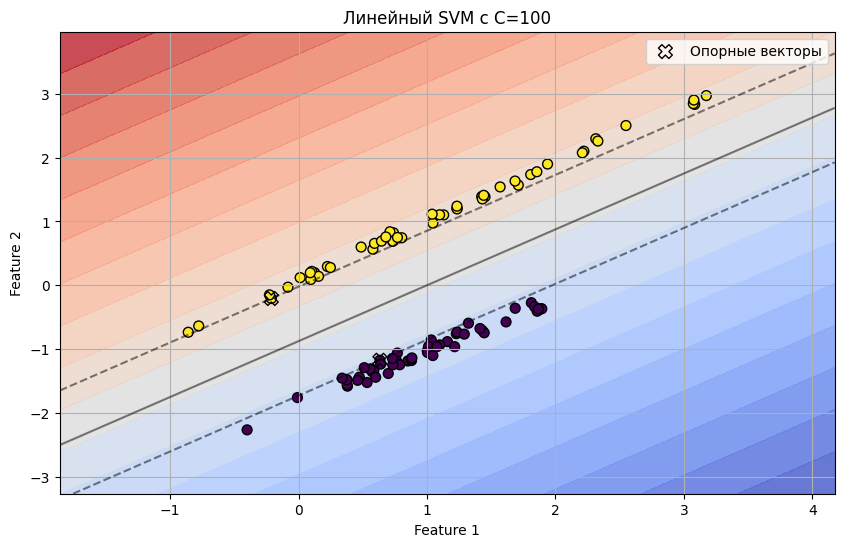

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Генерация линейно разделимых классов
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Функция для визуализации SVM
def plot_svm(X, y, C):
    # Обучение SVM
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Создание сетки для предсказаний
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)

    # Отображение опорных векторов
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', marker='X', label='Опорные векторы')

    # Линии уровня для f(x) = ±1
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.title(f'Линейный SVM с C={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Тестирование с различными значениями параметра C
C_values = [0.01, 1, 100]
for C in C_values:
    plot_svm(X, y, C)



4. Влияние параметра C:

1. Низкое значение C:
   - Модель допускает большее количество ошибок на обучающей выборке.
   - Опорные векторы могут быть выбраны из более широкого диапазона данных, что может привести к большему количеству опорных векторов.

2. Высокое значение C:
   - Модель стремится минимизировать количество ошибок на обучающей выборке, что приводит к более жесткому разделению классов.
   - Меньшее количество опорных векторов, так как модель будет пытаться правильно классифицировать как можно больше точек, включая те, которые находятся ближе к границе.

Влияние на разные выборки:

- Линейно разделимые данные: 
  - Для таких данных число опорных векторов будет меньше при высоком C и может увеличиваться при низком C.
  
- Сложные или шумные данные:
  - При высоком C модель может захватывать шумовые точки как опорные векторы, что увеличивает их количество.
  - При низком C модель будет более устойчивой к шуму, но может иметь больше опорных векторов, если данные сложные и неразделимые.

In [ ]:
5

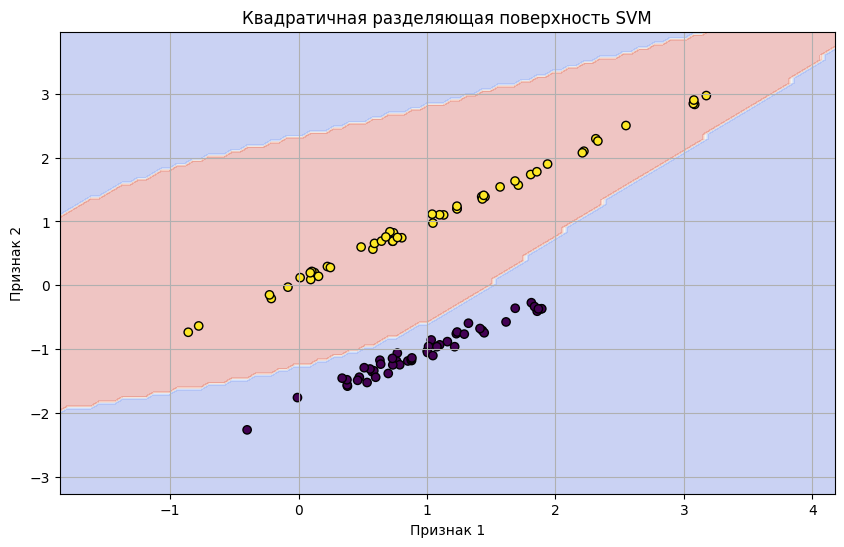

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Преобразование признаков в полиномиальные
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Обучение модели SVM с полиномиальным ядром
clf = svm.SVC(kernel='poly', degree=2, C=1)
clf.fit(X_poly, y)

# Создание сетки для визуализации
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Визуализация данных и разделяющей поверхности
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Квадратичная разделяющая поверхность SVM')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()


Задание № 3 

     pcost       dcost       gap    pres   dres
 0: -6.1535e+01 -2.2603e+02  9e+02  2e+00  3e-15
 1: -3.8296e+01 -1.3827e+02  1e+02  3e-02  2e-15
 2: -3.7901e+01 -3.9814e+01  2e+00  5e-04  1e-15
 3: -3.7999e+01 -3.8018e+01  2e-02  5e-06  1e-15
 4: -3.8000e+01 -3.8000e+01  2e-04  5e-08  1e-15
 5: -3.8000e+01 -3.8000e+01  2e-06  5e-10  1e-15
Optimal solution found.


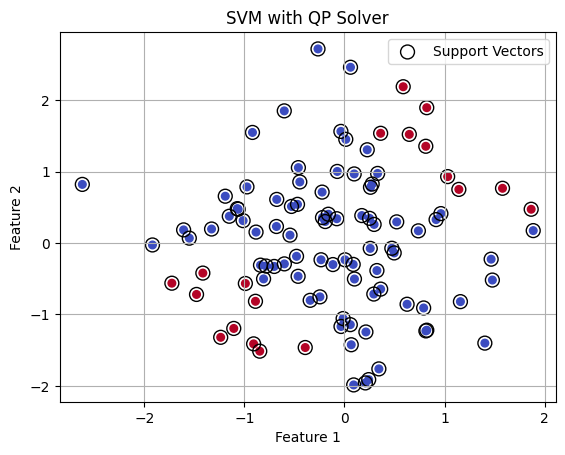

Support Vectors: [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763 ]
 [ 0.0675282  -1.42474819]
 [-0.54438272  0.11092259]
 [-1.15099358  0.37569802]
 [-0.60063869 -0.29169375]
 [-0.60170661  1.85227818]
 [-0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012]
 [-1.32818605  0.19686124]
 [ 0.73846658  0.17136828]
 [-0.11564828 -0.3011037 ]
 [-1.47852199 -0.71984421]
 [-0.46063877  1.05712223]
 [ 0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228]
 [-0.676922    0.61167629]
 [ 1.03099952  0.93128012]
 [-0.83921752 -0.30921238]
 [ 0.33126343  0.97554513]
 [-0.47917424 -0.18565898]
 [-1.10633497 -1.19620662]
 [ 0.81252582  1.35624003]
 [-0.07201012  1.0035329 ]
 [ 0.36163603 -0.64511975]
 [ 0.36139561  1.53803657]
 [-0.035826

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Генерация данных
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = np.sign(X[:, 0] * X[:, 1] - 0.5)  # Разделяющая поверхность

# Преобразование меток
y[y == 0] = -1  # Преобразуем метки 0 в -1

# Параметры SVM
C = 1.0  # Параметр регуляризации

# Формулирование задачи QP
m, n = X.shape
K = np.dot(X, X.T) * np.outer(y, y)  # Ядро (линейное)

# Формирование матриц для QP
P = matrix(K)
q = matrix(-np.ones(m))
G = matrix(np.vstack((-np.eye(m), np.eye(m))))
h = matrix(np.hstack((np.zeros(m), C * np.ones(m))))
A = matrix(y, (1, m))
b = matrix(0.0)

# Решение QP
sol = solvers.qp(P, q, G, h, A, b)

# Получение альфа
alpha = np.array(sol['x']).flatten()

# Находим поддерживающие векторы
support_indices = np.where(alpha > 1e-5)[0]
support_vectors = X[support_indices]
support_vector_labels = y[support_indices]
support_vector_alphas = alpha[support_indices]

# Вычисление смещения b
b = np.mean(support_vector_labels - np.dot(support_vectors, np.dot(X.T, support_vector_alphas * support_vector_labels)))

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title('SVM with QP Solver')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

print("Support Vectors:", support_vectors)
print("Bias (b):", b)

2

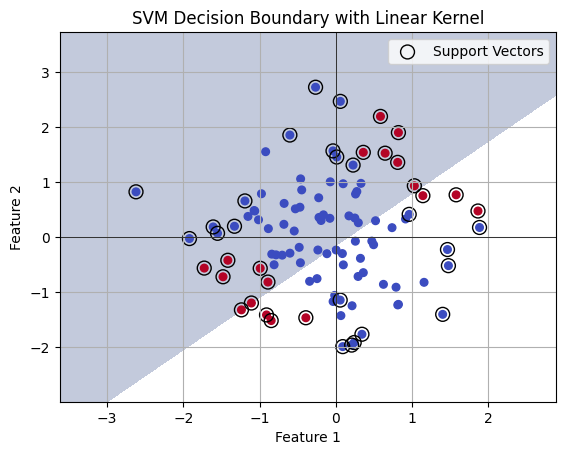

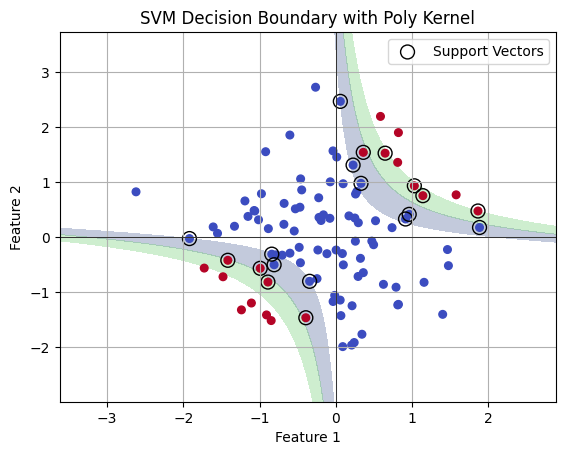

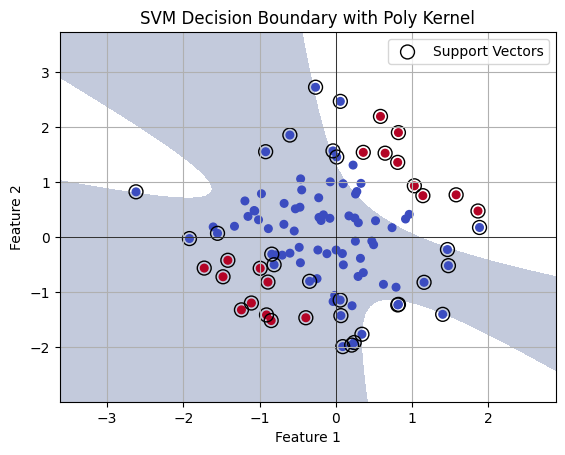

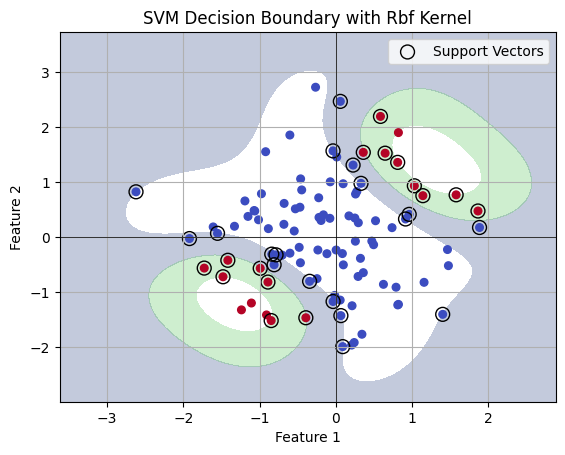

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Генерация случайных данных
def generate_data(n_samples=100):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = np.sign(X[:, 0] * X[:, 1] - 0.5)  # Разделяющая поверхность
    return X, y

# Визуализация
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(f'SVM Decision Boundary with {clf.kernel.capitalize()} Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.grid()
    plt.show()

# Основной код
X, y = generate_data(n_samples=100)

# Линейное ядро
clf_linear = SVC(kernel='linear', C=1.0)
clf_linear.fit(X, y)
plot_decision_boundary(clf_linear, X, y)

# Полиномиальное ядро (степень 2)
clf_poly2 = SVC(kernel='poly', degree=2, C=1.0)
clf_poly2.fit(X, y)
plot_decision_boundary(clf_poly2, X, y)

# Полиномиальное ядро (степень 3)
clf_poly3 = SVC(kernel='poly', degree=3, C=1.0)
clf_poly3.fit(X, y)
plot_decision_boundary(clf_poly3, X, y)

# Гауссовское RBF ядро
clf_rbf = SVC(kernel='rbf', gamma=1.0, C=1.0)
clf_rbf.fit(X, y)
plot_decision_boundary(clf_rbf, X, y)

3

1. Низкое значение C:
   - Гибкость: Модель допускает больше ошибок на обучающей выборке, что приводит к более "мягкому" разделению классов.
   - Устойчивость к шуму: Модель становится более устойчивой к выбросам и шуму в данных, так как она не стремится к идеальному разделению.
   - Количество опорных векторов: Может увеличиться, так как модель позволяет некоторым точкам находиться на неправильной стороне разделяющей гиперплоскости.

2. Высокое значение C:
   - Жесткость: Модель пытается минимизировать количество ошибок, что приводит к более строгому разделению классов.
   - Риск переобучения: Высокое значение C может привести к переобучению, особенно если данные содержат шум или выбросы.
   - Количество опорных векторов: Может уменьшиться, так как модель будет стремиться правильно классифицировать все точки.

Степень ядра p

1. Низкие значения p (например, p = 1 или p = 2):
   - Простота модели: Полиномиальное ядро создает более простые модели, которые могут не захватывать сложные зависимости в данных.
   - Недостаток гибкости: Модель может недообучаться, если данные имеют сложную структуру.

2. Высокие значения p:
   - Сложность модели: Позволяет модели захватывать более сложные зависимости и структуры в данных.
   - Риск переобучения: С увеличением степени ядра возрастает риск переобучения, особенно при высоком C.
   - Чувствительность к шуму: Модель может стать чрезмерно сложной и чувствительной к шуму.

Взаимодействие между C и p

- Низкое C и низкое p: Модель будет устойчивой, но может недообучаться.
- Высокое C и высокое p: Модель будет пытаться идеально разделить классы, что может привести к переобучению.
- Низкое C и высокое p: Гибкость модели увеличивается, но недостаток строгого контроля над ошибками может привести к чрезмерной сложности.
- Высокое C и низкое p: Модель будет жестко разделять классы, но может не захватить сложные зависимости.


4

Параметр C:

Низкие значения C:

Модель будет менее чувствительной к ошибкам на обучающей выборке, что может привести к более гладкой границе решения.
Это может вызвать недообучение, особенно если данные сложные и имеют явные паттерны.
Высокие значения C:

Модель станет более чувствительной к ошибкам, что позволит ей лучше подстраиваться под данные.
Однако это может привести к переобучению, особенно если данные содержат шум или выбросы.
Параметр γ:

Низкие значения γ:

Модель будет учитывать более широкий контекст при формировании границы решения.
Это может привести к недостаточной гибкости модели, что также может вызвать недообучение.
Высокие значения γ:

Модель будет учитывать более узкий контекст, что позволяет ей подстраиваться под сложные зависимости в данных.
Это может привести к переобучению, так как модель будет слишком точно следовать за обучающими данными, включая шум.
Взаимодействие между C и γ:

Комбинация низкого C и низкого γ:

Модель будет слишком грубой и не сможет уловить сложные зависимости в данных (недообучение).
Комбинация высокого C и высокого γ:

Модель станет очень сложной и может переобучиться, уловив даже шум в данных.
Комбинация низкого C и высокого γ:

Модель может быть слишком сложной, но при этом не будет «наказывать» за ошибки, что также может привести к плохой обобщающей способности.
Комбинация высокого C и низкого γ:

Модель будет сильно адаптироваться к данным, но не сможет уловить сложные паттерны, что также приведет к плохой обобщающей способности.

Лучшие параметры: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Лучшее значение кросс-валидации: 0.9714285714285715
Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Матрица путаницы:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


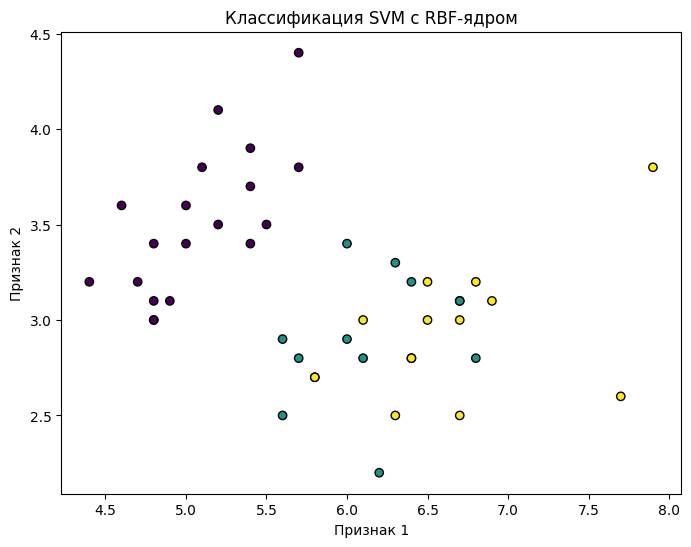

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных (например, датасет Ирис)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение параметров для поиска по сетке
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# Создание модели SVM
svm = SVC()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Результаты поиска по сетке
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение кросс-валидации:", grid_search.best_score_)

# Оценка модели на тестовых данных
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Вывод результатов
print("Отчет о классификации:\n", classification_report(y_test, y_pred))
print("Матрица путаницы:\n", confusion_matrix(y_test, y_pred))

# Визуализация результатов (если требуется)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k')
plt.title('Классификация SVM с RBF-ядром')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()